# COGS209 Project 2 


In [4]:
import pandas as pd, numpy as np
#rom sklearn.linear_model import Ridge,Lasso

#from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import linear_model

#from statsmodels.regression.linear_model import OLS
data=pd.read_csv('https://www.dropbox.com/scl/fi/eut3hbc6vh94713teclkd/heart.csv?rlkey=24b949anqmwjs4g9zstvdyrv0&st=xb2s3u6m&dl=1')

In [5]:
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [6]:
# preprocess the data by converting the categorical variable into numerical values 
# Import LabelEncoder 
from sklearn.preprocessing import LabelEncoder

# convert categorical data to numerical data 
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

# display the first 5 rows of the data for validation that the conversion was successful
print(data.head())



   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [11]:
# process the data for K-nearest neighbors algorithm

# split the data into features and target variable
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Best K value: 11


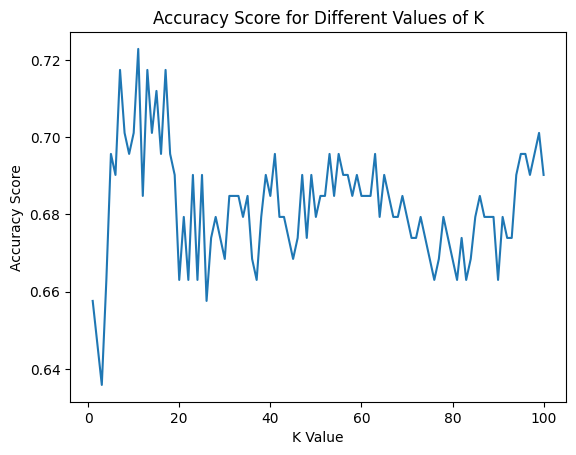

In [13]:
# train the K-nearest neighbors model on multiple values of K to determine the best 
# value of K for the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# list potential K values
k_values = list(range(1, 101))

# create a list to store the accuracy scores for each K value
accuracy_scores = []

# loop through each K value and calculate the accuracy score for the model
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# find the K value with the highest accuracy 
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print('Best K value:', best_k)

# plot the accuracy score for each value of K to visualize the best K value
plt.plot(k_values, accuracy_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of K')
plt.show()